# Basic Neural Network


## Example 1

Consider a simple neural network with one weight $ w $ and no bias. Let the input $ x $ and the actual output $ y $ be given. The prediction $ \hat{y} $ is:

$$ \hat{y} = w \cdot x $$

The MSE loss function for a single data point is:

$$ \text{MSE} = (y - \hat{y})^2 $$

### Step-by-Step Calculation

1. **Prediction**: Compute the predicted output $ \hat{y} $:

   $$ \hat{y} = w \cdot x $$

2. **Loss Calculation**: Compute the MSE loss:

    $$ \text{MSE} = (y - w \cdot x)^2 $$

   Let's take a numerical example to illustrate this process.

   **Numerical Example:**
   - Suppose $ x = 2 $, $ y = 5 $, and the current weight $ w = 1 $.

   **Prediction**:

   $$ \hat{y} = 1 \cdot 2 = 2 $$

   **Loss Calculation**:

   $$ \text{MSE} = (5 - 2)^2 = 9 $$

3. **Gradient Calculation**: Compute the partial derivative of the loss with respect to the weight $ w $:

   $$ \frac{\partial \text{MSE}}{\partial w} = \frac{\partial}{\partial w} (y - w \cdot x)^2 $$

   Using the chain rule:

   $$ \frac{\partial \text{MSE}}{\partial w} = 2 (y - w \cdot x) \cdot (-x) $$

   Substitute the values from our example:

   $$ \frac{\partial \text{MSE}}{\partial w} = 2 (5 - 1 \cdot 2) \cdot (-2) $$

   $$ \frac{\partial \text{MSE}}{\partial w} = 2 (5 - 2) \cdot (-2) $$

   $$ \frac{\partial \text{MSE}}{\partial w} = 2 \cdot 3 \cdot (-2) $$

   $$ \frac{\partial \text{MSE}}{\partial w} = -12 $$

4. **Update the Weight**: Use the gradient to update the weight $ w $ using gradient descent:
   - Choose a learning rate $ \eta $, typically a small positive number.
   - Update rule: $ w_{\text{new}} = w_{\text{old}} - \eta \cdot \frac{\partial \text{MSE}}{\partial w} $

   **For example:**
   - Suppose the learning rate $ \eta = 0.1 $.

   **Weight Update**:
   
   $$ w_{\text{new}} = 1 - 0.1 \cdot (-12) $$
   $$ w_{\text{new}} = 1 + 1.2 $$
   $$ w_{\text{new}} = 2.2 $$

So, after one iteration of gradient descent with MSE loss, the updated weight $ w $ is $ 2.2 $.

### Iterative Process

This process repeats for each training sample during training:
- Compute $ \hat{y} $.
- Calculate $ \text{MSE} $.
- Compute $ \frac{\partial \text{MSE}}{\partial w} $.
- Update $ w $.

Through multiple iterations (epochs), the network learns to minimize the MSE loss across all training samples, improving its ability to predict $ y $ from $ x $.

### Conclusion

The gradient of the loss function (in this case, MSE) with respect to the weights of the network tells us how to adjust the weights to reduce the error between predicted and actual outputs during training. This iterative process is fundamental in training neural networks using gradient-based optimization algorithms like gradient descent.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the input and output data (tensor form)
x_data = torch.tensor([2.0])  # Input
y_data = torch.tensor([5.0])  # Actual output

# Define the model: Linear regression model with one weight parameter
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.w = nn.Parameter(torch.tensor([1.0]))  # Weight parameter

    def forward(self, x):
        return self.w * x

# Instantiate the model
model = LinearRegression()

# Define the Mean Squared Error (MSE) loss function
criterion = nn.MSELoss()

# Define the optimizer (Gradient Descent optimizer with learning rate 0.1)
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 5  # Number of training epochs

for epoch in range(epochs):
    # Forward pass
    y_pred = model(x_data)

    # Compute loss
    loss = criterion(y_pred, y_data)

    # Backward pass and optimize
    optimizer.zero_grad()  # Clear gradients
    loss.backward()  # Compute gradients
    optimizer.step()  # Update weights

    # Print progress
    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, Updated weight: {model.w.item():.4f}, Y: {y_data.item():.4f}, Y_pred: {y_pred.item():.4f}')
    # Print gradients
    print(f'Gradients: {model.w.grad.item():.4f}')

# After training, you can access the updated weight
print(f'Final weight: {model.w.item():.4f}')


Epoch [1/5], Loss: 9.0000, Updated weight: 2.2000, Y: 5.0000, Y_pred: 2.0000
Gradients: -12.0000
Epoch [2/5], Loss: 0.3600, Updated weight: 2.4400, Y: 5.0000, Y_pred: 4.4000
Gradients: -2.4000
Epoch [3/5], Loss: 0.0144, Updated weight: 2.4880, Y: 5.0000, Y_pred: 4.8800
Gradients: -0.4800
Epoch [4/5], Loss: 0.0006, Updated weight: 2.4976, Y: 5.0000, Y_pred: 4.9760
Gradients: -0.0960
Epoch [5/5], Loss: 0.0000, Updated weight: 2.4995, Y: 5.0000, Y_pred: 4.9952
Gradients: -0.0192
Final weight: 2.4995


## Linear Regression

The example above is a simple linear regression model with one weight and no bias. In practice, linear regression models can have multiple weights (coefficients) and an additional bias term. The process of training a linear regression model involves minimizing a loss function (e.g., MSE) by adjusting the weights and bias through gradient descent.

In [2]:
import matplotlib.pyplot as plt
import numpy

In [25]:
n_points = 1000
x = torch.randn((n_points, 1))

y = -5 * x + 2 + torch.randn(n_points,1)

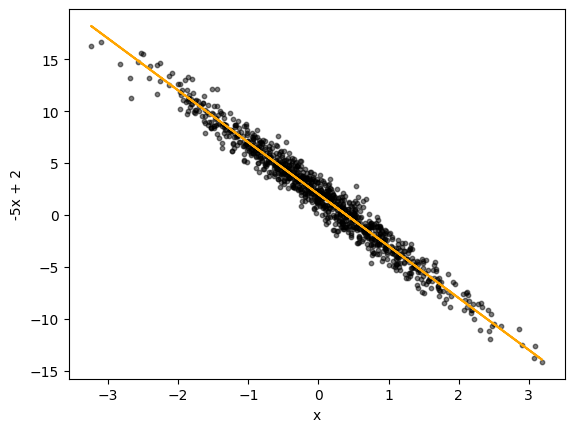

In [27]:
plt.scatter(x, y, s=10, c='black', alpha=0.5)
plt.xlabel('x')
plt.ylabel('-5x + 2')
plt.plot(x, -5 * x + 2, color='orange',)
plt.show()

In [43]:
# Define the weight and bias parameters

w = torch.tensor([1.0], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)

# h = lambda x: w * x + b # Hypothesis function

def h(x):
    return w * x + b

mse = lambda y, yhat: torch.mean((y - yhat) ** 2) # Mean Squared Error (MSE) loss function

In [44]:
w , b

(tensor([1.], requires_grad=True), tensor([0.], requires_grad=True))

In [45]:
indexes = numpy.random.choice(n_points, 10)
indexes, x[indexes]

(array([934, 463, 701, 724, 675, 678, 743, 543,  29, 692]),
 tensor([[-0.2419],
         [ 1.1667],
         [ 2.5996],
         [-0.8262],
         [ 0.3695],
         [ 0.2122],
         [ 1.3433],
         [-0.3641],
         [-1.0563],
         [ 3.1883]]))

In [62]:
# stochastic gradient descent

epochs = 10
batch = 20
lr = 0.05

# For tracking progress
losses = []
weights = []
biases = []

# stochastic gradient descent with explicit math steps

epochs = 10
batch = 20
lr = 0.05

# For tracking progress
losses = []
weights = []
biases = []

for epoch in range(epochs):
    # Sample a random batch
    indexes = numpy.random.choice(n_points, batch)
    x_batch = x[indexes]
    y_batch = y[indexes]

    # Forward pass - compute predictions manually
    # Linear function: yhat = wx + b
    yhat = h(x_batch)
    
    # Compute MSE loss explicitly: (1/n) * Σ(y - yhat)²
    loss = mse(y_batch, yhat)
    
    # Save the current state
    losses.append(loss.item())
    weights.append(w.item())
    biases.append(b.item())
    
    # Compute gradients (backward pass)
    loss.backward()
    
    # Print gradient information
    # For MSE, ∂Loss/∂w = (-2/n) * Σ(y - yhat) * x
    # For MSE, ∂Loss/∂b = (-2/n) * Σ(y - yhat)
    print(f"Epoch {epoch} gradients:")
    print(f"  dLoss/dw: {w.grad.item():.4f}")
    print(f"  dLoss/db: {b.grad.item():.4f}")
    
    # Manual gradient descent update
    with torch.no_grad():
        w -= w.grad * lr
        b -= b.grad * lr
        
        # Reset gradients for next iteration
        w.grad.zero_()
        b.grad.zero_()
    
    # Print progress every 2 epochs or at the end
    if epoch % 2 == 0 or epoch == epochs-1:
        print(f'Epoch {epoch}: Loss = {loss.item():.4f}, Weight = {w.item():.4f}, Bias = {b.item():.4f}')

# Compare final parameters with target parameters
print(f"Final parameters: Weight = {w.item():.4f}, Bias = {b.item():.4f}")
print(f"Target parameters: Weight = -5, Bias = 2")

Epoch 0 gradients:
  dLoss/dw: -0.6757
  dLoss/db: -0.2086
Epoch 0: Loss = 0.7134, Weight = -5.0204, Bias = 1.9483
Epoch 1 gradients:
  dLoss/dw: -0.3992
  dLoss/db: 0.1149
Epoch 2 gradients:
  dLoss/dw: 0.4960
  dLoss/db: 0.1407
Epoch 2: Loss = 1.2645, Weight = -5.0252, Bias = 1.9355
Epoch 3 gradients:
  dLoss/dw: 0.3273
  dLoss/db: -0.4170
Epoch 4 gradients:
  dLoss/dw: 0.1912
  dLoss/db: 0.2053
Epoch 4: Loss = 1.0682, Weight = -5.0511, Bias = 1.9461
Epoch 5 gradients:
  dLoss/dw: 0.3247
  dLoss/db: 0.0962
Epoch 6 gradients:
  dLoss/dw: -0.2238
  dLoss/db: -0.5298
Epoch 6: Loss = 0.6001, Weight = -5.0562, Bias = 1.9677
Epoch 7 gradients:
  dLoss/dw: -0.0683
  dLoss/db: -0.3494
Epoch 8 gradients:
  dLoss/dw: 0.1034
  dLoss/db: 0.4929
Epoch 8: Loss = 1.0003, Weight = -5.0579, Bias = 1.9606
Epoch 9 gradients:
  dLoss/dw: -1.0371
  dLoss/db: 0.3302
Epoch 9: Loss = 1.0126, Weight = -5.0061, Bias = 1.9441
Final parameters: Weight = -5.0061, Bias = 1.9441
Target parameters: Weight = -5, Bia

In [55]:
w , b

(tensor([-4.9339], requires_grad=True), tensor([1.9462], requires_grad=True))